<a href="https://colab.research.google.com/github/Zaqzxcswsde/itmo-applied-statistics/blob/main/stat_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TODO: переделать парсинг, чтобы работал с дробями и переменными

In [ ]:
#@title Imports { display-mode: "form" }
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from os import listdir
# from google.colab import drive
#drive.mount('/content/drive')
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import product
from scipy import special
# как можно скачать файл напрямую из гуглдиска сюда в директорию /content
# !gdown 1Xtw5-jqrDJmh318t1jtKHvOJXxMrB9XF
from math import factorial
from decimal import *
import sympy
from math import fsum
from fractions import Fraction
import scipy
from scipy import stats
from sympy import integrate, Symbol
from math import pi,sqrt
from numpy import exp
from more_itertools import pairwise

---
---
---

# Неделя 1

---
## Function Definitions

In [ ]:
#@title Получить произведение всех чисел в листе
def list_product(array):
  s = 1
  for i in array:
    s *= i
  return s

In [ ]:
#@title Функции комбинаторики

# формула C из комбинаторики с повторениями и без
def comb(n,k, *, repetition=0):
  if repetition: return comb(n+k-1,k)
  else: return Decimal(factorial(n))/Decimal(Decimal(factorial(k))*Decimal(factorial(n-k)))

# 4 основные функции комбинаторики объединены в одну, повторения есть? порядок важен? n? k?
def prob(n,k,o,r):
  if not o: return Decimal(comb(n,k,repetition=r))
  elif r: return Decimal(n)**Decimal(k)
  else: return Decimal(special.perm(n,k))

# упрощённый доступ напрямую к C из n по k
def cnk(n,k):
  return Decimal(prob(n,k,0,0))

In [ ]:
#@title Конкатенация листа в строчку
def conc(lst):
  c = ''
  for i in lst:
    c+=str(i)
  return c

In [ ]:
#@title Является ли число факториалом другого?
def isfactorial(x):
  if not isinstance(x,int) or x<1: return -1
  i=0
  while factorial(i)<x:
    i+=1
  if factorial(i)==x: return i
  else: return -1

In [ ]:
#@title Перевод числа в 6-ти-ричную систему
def tosix(n):
    if n == 0:
        return ['0']
    digits = []
    while n:
        digits.append(str(int(n % 6)))
        n //= 6
    return digits[::-1]

In [ ]:
#@title Является ли лист уникальным? Не работает, если там хранятся другие листы (и прочие нехешитруемые типы)
def isunique(lst):
  return len(list(lst)) == len(list(set(list(lst))))

---
## Code itself

In [ ]:
# сколько из всех вариантов пар произведений чисел от 1 до 4 целочисленно делятся на три 
list(map(lambda a: a % 3, map(lambda a: a[0]*a[1], itertools.product(np.arange(1,5),np.arange(1,5))))).count(0)

7

In [ ]:
# у скольки из всех вариантов пар произведений чисел от 1 до 4 сумма превышает произведение 
len([1 for a in itertools.product(np.arange(1,5),np.arange(1,5)) if a[0]+a[1]>a[0]*a[1]])

7

In [ ]:
# сколькими способами можно выбрать из n пар детей двих так, чтобы они были из разных пар?
pair_count=3
4*sum(range(1,pair_count))

12

In [ ]:
# или так
all_possible_combinations=list(map(list,list(product(range(6),repeat=2))))
all_possible_pair_variations=[[x[0]//2,x[1]//2] for x in all_possible_combinations]
apc_with_rep_1=list(map(set,all_possible_combinations))
apc_with_rep_2=[x for x in apc_with_rep_1 if len(x)>1]
apc_without_rep=list(map(list,(set(map(tuple,apc_with_rep_2)))))
apc_with_rep_pairs_1=[[x[0]//2,x[1]//2] for x in list(map(list,apc_without_rep))]
apc_with_rep_pairs_2=list(map(set,apc_with_rep_pairs_1))
apc_without_rep_pairs=[x for x in apc_with_rep_pairs_2 if len(x)==2]
len(apc_without_rep_pairs)

12

In [ ]:
# из цифр от 0 до 5 составили декартово проиведение длиной 4, в скольких вариантах нет повторений цифр?
# способ 1
len([x for x in map(set,product(range(0,6),repeat=4)) if len(x)==4])

360

In [ ]:
# способ 2
sum(list(map(isunique,[''.join(tosix(x)).zfill(4) for x in range(0,6**4)])))

360

In [ ]:
# или так! 6 вариантов на первую, 5 на вторую и тд до четвёртой
6*5*4*3

360

---
---
# Неделя 2


---
## Function definitions

In [ ]:
#@title Парсинг таблиц из опенеду в датафрейм/серию/лист
# Работает только с числовыми значениями, не работает с переменными или дробями - TODO
def OpenEduTexToArrayOfArrays(full_tex,dec=True):
  def is_float(element):
    try:
        float(element)
        return True
    except ValueError:
        return False
  full_tex=full_tex.replace(r'\hline','\n')      
  full_tex=list(map(lambda a: a.split(),full_tex.split('\n')))
  for i,x in enumerate(full_tex):
    full_tex[i]=[y for y in x if is_float(y)]
  full_tex = [x for x in full_tex if len(x)>0]
  if dec:
    for i,x in enumerate(full_tex):
      full_tex[i]=list(map(lambda a: Fraction(str(a)),x))
  return full_tex
def ArrayOfArraysWithIndexsAndColumnsToDataFrame(arrofarr):
  if len(arrofarr)<=2: raise RuntimeError('don\'t use this function for series!')
  if len(arrofarr[0])<len(arrofarr[1]): arrofarr[0] = [''] + arrofarr[0]
  npaoa = np.array(arrofarr)
  return DataFrame(npaoa[1:,1:],columns=npaoa[0,:][1:],index=npaoa[:,0][1:],dtype="object")
def TTDFOVAP(full_tex,dec=True): # TexToDataFrameOrValsAndProbs
  arrofarr=OpenEduTexToArrayOfArrays(full_tex,dec=dec)
  if len(arrofarr)==1: return arrofarr[0]
  elif len(arrofarr)==2: return (arrofarr[0],arrofarr[1])
  else: return ArrayOfArraysWithIndexsAndColumnsToDataFrame(arrofarr)

In [ ]:
#@title Медиана распределения случайной величины
def myMedian(vals, probs):
  m_1 = [i for i,_ in enumerate(probs) if ((sum(probs[:i+1])>0.5) and (sum(probs[i:])>0.5))]
  m_1_e = [vals[v] for v in m_1]
  m_2 = m_1_e[0] if len(m_1_e)==1 else (max(m_1_e)+min(m_1_e))/2
  return m_2

In [ ]:
#@title Проверка величин на независимость, !!!!!внутри DataFrame'а нужны Decimal'ы/Fractions'ы!!!!!
def CheckIndependence(df):
  xsi=df.sum(axis=0) # this produces series of decimals, as expected
  # eta=df.sum(axis=1) # this instead produces series of floats, not decimals - presumably pandas bug
  eta=Series({k:v.sum() for k,v in df.iterrows()})
  # xsi=xsi.apply(lambda a: Decimal(str(a)))
  # eta=eta.apply(lambda a: Decimal(str(a)))
  df2 = pd.DataFrame(columns=df.columns, index=df.index)
  for i in df.columns:
    for j in df.index:
      df2[i][j]=xsi[i]*eta[j]
  return df.equals(df2)

In [ ]:
#@title Математическое ожидание распределения случайной величины
def myExpectedValue(vals, probs):
  vals = np.asarray(vals)
  probs = np.asarray(probs)
  return (vals * probs).sum()

In [ ]:
#@title Совместное распределение -> мат.ожидание их произведения
def TablToExpectedOfMult(df):
  df2=DataFrame(columns=df.columns,index=df.index)
  for i in df2.columns:
    for j in df2.index:
      df2[i][j]=i*j
  ss={}
  for i in df2.columns:
    for j in df2.index:
      if df2[i][j] in ss.keys():
        ss[df2[i][j]]+=df[i][j]
      else:
        ss[df2[i][j]]=df[i][j]
  print(ss)
  return sum(np.asarray(list(ss.keys()))*np.asarray(list(ss.values())))

In [ ]:
#@title Распределение случайной величины -> дисперсия
def MyVariance(vals,probs):
  ev = myExpectedValue(vals,probs)
  vals2=[(x-ev)**2 for x in vals]
  disp = myExpectedValue(vals2,probs)
  return disp

In [ ]:
#@title Распределение случайной величины -> дисперсия 2
def MyVariance2(vals,probs):
  ev = myExpectedValue(vals,probs)
  vals2=[x**2 for x in vals]
  disp = myExpectedValue(vals2,probs)
  return disp-ev**2

In [ ]:
#@title Совместное распределение -> мат.ожидание обеих - сначала по столбцам, потом по строкам
def MyJointDistributionToExpectedOfBoth(df):
  xsi,eta=MyJointDistributionToMarginalDistribution(df)
  xsi_ev=myExpectedValue(xsi.index,xsi.values)
  eta_ev=myExpectedValue(eta.index,eta.values)
  return (xsi_ev,eta_ev)

In [ ]:
#@title Совметное распределение -> маргинальное распределение
def MyJointDistributionToMarginalDistribution(df):
  xsi=df.sum(axis=0)
  eta=Series({k:v.sum() for k,v in df.iterrows()})
  return (xsi,eta)

In [ ]:
#@title Маргинальное распределение / дисперсия -> СКО
def MyStandardDeviation(vals=None,probs=None,var=None):
  if not var: return decimal_from_fraction(MyVariance(vals,probs))**Decimal(0.5)
  else: return decimal_from_fraction(var)**Decimal(0.5)

In [ ]:
#@title Совметное распределение -> ковариация
def MyCovariance(df):
  ksi_ev, eta_ev = MyJointDistributionToExpectedOfBoth(df)
  return TablToExpectedOfMult(df) - ksi_ev*eta_ev

In [ ]:
#@title Совметное распределение -> дисперсия обеих
def MyJointDistributionToVarianceOfBoth(df):
  xsi, eta = MyJointDistributionToMarginalDistribution(df)
  xsi_var = MyVariance(xsi.index,xsi.values)
  eta_var = MyVariance(eta.index,eta.values)
  return (xsi_var,eta_var)

In [ ]:
#@title Совметное распределение -> коэффицент корелляции (Пирсона)
def MyPearsonCorrelationCoefficient(df):
  cov = MyCovariance(df)
  if cov == Decimal('0'): return Decimal('0')
  xsi_var, eta_var = MyJointDistributionToVarianceOfBoth(df)
  if xsi_var == eta_var: return cov/xsi_var
  xsi_dev = MyStandardDeviation(var=xsi_var)
  eta_dev = MyStandardDeviation(var=eta_var)
  return decimal_from_fraction(cov)/(xsi_dev*eta_dev)

In [ ]:
#@title Decimal -> Fraction
def decimal_from_fraction(frac):
  if isinstance(frac,Decimal): return frac
  return frac.numerator / Decimal(frac.denominator)

In [ ]:
#@title Схема бернули в нунжном мне виде
def MyBernoulli(n,k,p,q=None): # n - всего, k - нужно удач, p - вероятность удачи, q - вероятность неудачи
  n = Decimal(n)
  k = Decimal(k)
  p = Decimal(str(p))
  if not q: q = Decimal(1-p)
  return Decimal(cnk(n,k))*(Decimal(p)**Decimal(k))*(Decimal(q)**(n-k))

In [ ]:
#@title НЕ ИСПОЛЬЗОВАТЬ! Лобовая реализация вычисления мат. ожидания и дисперсии случайной величины схемы Бернулли
def BAD_MyXsiBernoulli(n,p,q=None):
  if not q: q = 1-p
  vals = range(0,n+1)
  probs = [MyBernoulli(n,x,Decimal(str(p)),Decimal(str(q))) for x in range(0,n+1)]
  ev=myExpectedValue(vals,probs)
  var=MyVariance(vals,probs)
  return (ev,var)

In [ ]:
#@title Нормальная реализация вычисления мат. ожидания и дисперсии случайной величины схемы Бернулли
def MyXsiBernoulli(n,p,q=None):
  if not q: q = 1 - p
  return (n*p,n*p*q)

In [ ]:
#@title Локальная теорема Муавра-Лапласа (n,p,A,B)->val
def MyLocML(n,p,A,B,r=4):
  A,B=min(A,B),max(A,B)
  q=1-p
  # koef=1/(sqrt(2*pi)*sqrt(n*p*q))
  val = round(sum(exp(-(((k-n*p)/(sqrt(n*p*q)))**2)/2) for k in range(A,B+1))*(1/(sqrt(2*pi)*sqrt(n*p*q))),4)
  return val

In [ ]:
#@title Теорема Пуассона (n,p,A,B)->(val,(leftErr,rightErr))
def MyPoisson(n,p,A,B,r=4):
  A,B=min(A,B),max(A,B)
  mu=n*p
  val = round(sum(((Decimal(Decimal(mu)**k)/Decimal(factorial(k))) * (exp(Decimal(-mu)))) for k in range(A,B+1)),r)
  err = Decimal(min(Decimal(str(p)),n*(Decimal(str(p))**2)))
  leftErr = val-err if val-err>0 else 0
  rightErr = val+err if val+err<1 else 1
  return (val,(leftErr,rightErr))

In [ ]:
#@title Интегральная теорема Муавра-Лапласа (n,p,A,B)->(val,err)
def MyIntML(n,p,A,B,r=4):
  A,B=min(A,B),max(A,B)
  q=1-p
  y=(B-n*p)/sqrt(n*p*q)
  z=(A-n*p)/sqrt(n*p*q)
  val = round(scipy.stats.norm.cdf(y)-scipy.stats.norm.cdf(z),r)
  err = round(1/(p*q*sqrt(n)),r)
  return (val,err)

In [ ]:
#@title Пуассон + Локальный М-Л
def MyPML(n,p,A,B,r=4):
  A,B=min(A,B),max(A,B)
  return (MyPoisson(n,p,A,B,r),MyLocML(n,p,A,B,r))

In [ ]:
#@title Бернулли для k между A и B
def MyABBernoulli(n,p,A,B,r=4):
  A,B=min(A,B),max(A,B)
  return round(sum(MyBernoulli(n,k,p) for k in range(A,B+1)),r)

---
## Code itself

### First Half

In [ ]:
# Количество орлов/решек при трёх подбрасываниях монеты
list(map(lambda a: a.count(0), itertools.product([0,1],repeat=3)))
list(map(lambda a: a.count(1), itertools.product([0,1],repeat=3)))

[0, 1, 1, 2, 1, 2, 2, 3]

In [ ]:
# Нахождение подбором одного неизвестного значения случайного распределения по известному математическому ожиданию и остальному распределению
for x in range(-1,14):
  vals = list(map(Decimal,f'-1 & 1 & 4 & {x} & 13'.split(' & ')))
  probs  = list(map(Decimal,'0.1 & 0.15 & 0.4 & 0.2 & 0.15'.split(' & ')))
  if myExpectedValue(vals, probs)==Decimal('5.2'): print(x)

8


In [ ]:
# Автоматическое нахождение уравнения для математического ожидания, хотя можно было просто посмотреть...
vals='3 5 7'.split(' ')
probs='p1 p2 0.3'.split(' ')
expr=sympy.sympify('+'.join([f'{x1}*{x2}' for x1,x2 in zip(vals,probs)]))
expr

3*p1 + 5*p2 + 2.1

In [ ]:
# Тест парсинга в vals,probs
full_tex=r"""\begin{array}{  c | c | c | c | c| c | c| c | c  }
\xi & -4 & -2 & 0 & 3 & 4 & 6 & 7 & 9  \\ \hline
\mathsf{P} & 0.1 & 0.15 & 0.05 & 0.15 & 0.1 & 0.05 & 0.25 & 0.15
\end{array}"""
vals,probs=TTDFOVAP(full_tex,dec=0)
vals,probs

(['-4', '-2', '0', '3', '4', '6', '7', '9'],
 ['0.1', '0.15', '0.05', '0.15', '0.1', '0.05', '0.25', '0.15'])

In [ ]:
# Тест парсинга в датафрейм
full_tex=r"""\begin{array}{  c | c | c | c | c  }
\eta \backslash \xi & -4 & -2 & 0 & 3  \\ \hline
2 & 0.02 & 0.02 & 0.06 & 0.1 \\ \hline
3 & 0.03 & 0.03 & 0.09 & 0.15 \\ \hline
5 & 0.02 & 0.02 & 0.06 & 0.1 \\ \hline
10 & 0.03 & 0.03 & 0.09 & 0.15
\end{array}"""
df = TTDFOVAP(full_tex)

In [ ]:
df

,-4,-2,0,3
2,1/50,1/50,3/50,1/10
3,3/100,3/100,9/100,3/20
5,1/50,1/50,3/50,1/10
10,3/100,3/100,9/100,3/20


In [ ]:
# Проверка независимости

# arr=np.array([[0.02,0.02,0.06,0.1],[0.03,0.03,0.09,0.15],[0.02,0.02,0.06,0.1],[0.03,0.03,0.09,0.15]])
# arr2 = np.vectorize(lambda a: Decimal(str(a)))(arr)
# df = pd.DataFrame(arr2,columns=[-4,-2,0,3], index=[2,3,5,10])

# full_tex=r"""\begin{array}{  c | c | c | c | c  }
# \eta \backslash \xi & -4 & -2 & 0 & 3  \\ \hline
# 2 & 0.02 & 0.02 & 0.06 & 0.1 \\ \hline
# 3 & 0.03 & 0.03 & 0.09 & 0.15 \\ \hline
# 5 & 0.02 & 0.02 & 0.06 & 0.1 \\ \hline
# 10 & 0.03 & 0.03 & 0.09 & 0.15
# \end{array}"""
# df = TTDFOVAP(full_tex)

CheckIndependence(df)

True

In [ ]:
# Нахождение ожидания произведения
TablToExpectedOfMult(df)

Fraction(477, 100)

In [ ]:
# проверка работы нахождения дисперсии
vals=[0,100]
probs=[99/100,1/100]
MyVariance(vals,probs) # MyVariance2(vals,probs)

99.0

In [ ]:
# проверка работы нахождения СКО
xsi,eta = MyJointDistributionToMarginalDistribution(df)
xsi_vals = xsi.index
xsi_probs = xsi.values
eta_vals = eta.index
eta_probs = eta.values

In [ ]:
MyStandardDeviation(xsi_vals,xsi_probs)

Decimal('2.385372088375312569654571324')

In [ ]:
MyStandardDeviation(eta_vals,eta_probs)

Decimal('3.226453160980335694543128270')

In [ ]:
# тест ковариации !
MyCovariance(df)

Fraction(0, 1)

In [ ]:
# тест коэффициента корелляции
MyPearsonCorrelationCoefficient(df)

Decimal('0')

In [ ]:
# Моделирование всего-всего-всего на примере двухкратного бросания игрального кубика
omega = list(itertools.product(np.arange(1,7),repeat=2))

# xsi - количество выпавших единиц
# eta - количество выпавших шестёрок

# xsi - 0/1/2
# eta - 0/1/2
omega_xsi_eta = np.array([[x.count(1),x.count(6)] for x in omega])
omega_xsi, omega_eta = omega_xsi_eta.T

# получаем маргинальное распределение
marg_xsi = np.unique(omega_xsi, return_counts=True)
marg_eta = np.unique(omega_eta, return_counts=True)

# преобразовываем в серию + починим вероятность
xsi = Series(list(map(lambda a: Fraction(a,len(omega)),marg_xsi[1])), index=marg_xsi[0])
eta = Series(list(map(lambda a: Fraction(a,len(omega)),marg_eta[1])), index=marg_eta[0])

# сразу получим совместное распределение
possible_vars = list(map(list,list(itertools.product([0,1,2],repeat=2))))
numbs = ['']*len(possible_vars)
for i,x in enumerate(possible_vars):
  numbs[i] = sum([1 for y in omega_xsi_eta if list(y)==x])
to_df = [[x[0][0],x[0][1],x[1]] for x in list(zip(possible_vars,numbs))]

df = DataFrame(index=[0,1,2],columns=[0,1,2]) 
for x in to_df:
  df[x[0]][x[1]]=Fraction(x[2],len(omega))

In [ ]:
df

,0,1,2
0,4/9,2/9,1/36
1,2/9,1/18,0
2,1/36,0,0


In [ ]:
# Математические ожидания кси/эта
MyJointDistributionToExpectedOfBoth(df)

(Fraction(1, 3), Fraction(1, 3))

In [ ]:
# Дисперсии кси/эта
MyJointDistributionToVarianceOfBoth(df)

(Fraction(5, 18), Fraction(5, 18))

In [ ]:
# Маетматическое ожидание произведения кси/эта
TablToExpectedOfMult(df)

Fraction(1, 18)

In [ ]:
# Ковариация
MyCovariance(df)

Fraction(-1, 18)

In [ ]:
# Коэффициент корелляции
MyPearsonCorrelationCoefficient(df)

Fraction(-1, 5)

In [ ]:
full_tex=r"""\begin{array}{  c | c | c | c | c  }
\xi & -4 & -2 & 0 & 3  \\ \hline
\mathsf{P} & 0.1 & 0.1 & 0.3 & 0.5
\end{array}"""
vals,probs=TTDFOVAP(full_tex)

In [ ]:
MyVariance(vals,probs)

Fraction(569, 100)

In [ ]:
full_tex=r"""\begin{array}{  c | c | c | c  }
\eta \backslash \xi & 2 & 3 & 5  \\ \hline
-1 & 0.1 & 0.3 & 0.2 \\ \hline
1 & 0.1 & 0.05 & 0 \\ \hline
4 & 0 & 0.15 & 0.1
\end{array}"""
df=TTDFOVAP(full_tex)

In [ ]:
df

,2,3,5
-1,1/10,3/10,1/5
1,1/10,1/20,0
4,0,3/20,1/10


In [ ]:
MyCovariance(df)

Fraction(9, 50)

In [ ]:
MyPearsonCorrelationCoefficient(df)

Decimal('0.07664850422701901346493947032')

In [ ]:
BAD_MyXsiBernoulli(10,0.75)

(Decimal('7.50000000000000000000'), Decimal('1.875000000000000000000000000'))

In [ ]:
MyXsiBernoulli(10,0.75)

(7.5, 1.875)

In [ ]:
# Просто для красоты, даже без заголовка и перенесения в блок с функциями :)
def MyDescribe(full_tex):
  df=TTDFOVAP(full_tex)
  print('MarginalDistributions: ', MyJointDistributionToMarginalDistribution(df)[0],MyJointDistributionToMarginalDistribution(df)[1],'------',sep='\n')
  print('ExpectedValues: ', MyJointDistributionToExpectedOfBoth(df),'------',sep='\n')
  print('Variances: ', MyJointDistributionToVarianceOfBoth(df),'------',sep='\n')
  print('Covariance: ', MyCovariance(df),'------',sep='\n')
  print('CorrelationCoefficient: ', MyPearsonCorrelationCoefficient(df), sep='\n')

In [ ]:
full_tex=r""" """
MyDescribe(full_tex)

MarginalDistributions: 
156     3/25
168     3/25
173    12/25
193     7/25
dtype: object
2    11/20
4     9/20
dtype: object
------
ExpectedValues: 
(Fraction(4399, 25), Fraction(29, 10))
------
Variances: 
(Fraction(88074, 625), Fraction(99, 100))
------
Covariance: 
-361/250
------
CorrelationCoefficient: 
-0.1222547506417396250214209794


### Second Half

In [ ]:
# по теореме Пуассона + погрешность, по локальной теореме Муавра-Лапласа
n=100
A=0
B=3
p=0.02
MyPML(n,p,A,B)

((Decimal('0.8571'), (Decimal('0.8371'), Decimal('0.8771'))), 0.8293)

In [ ]:
# по интегральной теореме Муавра-Лапласа + погрешность
p=0.13
n=20000
A=0
B=2650
MyIntML(n,p,A,B)

(0.8534, 0.0625)

In [ ]:
# w2p2t1 - week 2 part 2 task 1
n=1600
p=0.0026
A=5
B=1600

(MyABBernoulli(n,p,A,B),MyPoisson(n,p,A,B),MyIntML(n,p,A,B))

(Decimal('0.4024'),
 (Decimal('0.4024'), (Decimal('0.3998'), Decimal('0.4050'))),
 (0.34, 9.6404))

In [ ]:
# w2p2t2
n=4300
p=0.6
A=2535
B=2618

MyABBernoulli(n,p,A,B)

Decimal('0.8062')

In [ ]:
MyPoisson(n,p,A,B)

(Decimal('0.5908'), (0, 1))

In [ ]:
MyIntML(n,p,A,B)

(0.8009, 0.0635)

---
---
# Неделя 3

In [ ]:
np.random.uniform(0,5)

2.117585236938492

In [ ]:
s = 0
n = 1000000
for _ in range(n):
  A = np.random.uniform(0,5)
  B = np.random.uniform(0,5)
  otr1 = min(A,B)
  otr2 = 5-max(A,B)
  otr3 = abs(A-B)
  if (otr1+otr2>otr3) and (otr1+otr3>otr2) and (otr2+otr3>otr1): s+=1
s/n

0.25023

In [ ]:
ress = []
for __ in range(10):
  s = 0
  n = 100_000
  for _ in range(n):
    Y = np.random.uniform(0,26)
    X = np.random.uniform(0,26)
    if X==0: pass
    otr1 = Y*X
    otr2 = Y/X
    if (otr1<=17) and (otr2<=(676/17)): s+=1
  ress.append(s/n)

In [ ]:
np.mean(ress)

0.10534099999999999

In [ ]:
cnk(3,2)

Decimal('3')

In [ ]:
float(cnk(5,3))

10.0

In [ ]:
0.9*0.9*(4/5)*0.9*(3/5)*float(cnk(5,3))

3.4992000000000005

In [ ]:
0.9*0.9*(4/5)*0.9*(3/5)*float(cnk(5,3))+3*0.9*0.9*(1/5)*0.9*(4/5)*float(cnk(5,2))+float(cnk(3,2))*0.9*0.9*(4/5)*0.1

7.192800000000001

In [ ]:
0.9*0.9+0.9*0.9*0.9

1.5390000000000001

---
---
# Неделя 4

---
## Function definitions

In [ ]:
#@title Генератор случайной величины ~ Пуассону
def MyLikePoissonRandomVariable(n, lmbda):
  for i in range(0,n+1):
    yield ((lmbda**i)/factorial(i))*exp(-lmbda)

In [ ]:
#@title Генератор случайной величины ~ биномиальному
def MyLikeBinomRandomVariable(n, p):
  for i in range(0,n+1):
    yield MyBernoulli(n,i,p)

In [ ]:
#@title Генератор случайной величины ~ геометрическому
def MyLikeGeomRandomVariable(n, p):
  for i in range(1,n+1):
    yield p*((1-p)**(i-1))

In [ ]:
#@title Генератор функции распределения дискретной случайной величины
def GenerateDistributionFunction(xsi,p):
  min_xsi = min(xsi)
  pxsi = pairwise(xsi)
  val2 = list(enumerate(pxsi))
  cs = np.cumsum(p)
  def f_diskr_raspr(znach):
    # print('-----')
    # print(f"znach={znach}")
    # print(f'list(enumerate(pxsi))={list(enumerate(pxsi))}')
    # print(f'val2={val2}')
    # print(f'min(xsi)={min(xsi)}')
    # print('-----')
    if znach<=min_xsi: return 0
    for i,v in val2:
      if v[0]<znach<=v[1]: return cs[i]
    return 1
  return f_diskr_raspr

---
## Code itself

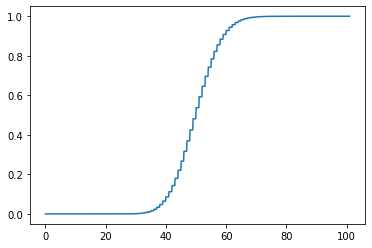

In [ ]:
# Построить график функции распределения дискретной случайной величины, заданной по принципу Пуассона
n=100
xsi = np.arange(0,n+1)
p = [x for x in MyLikePoissonRandomVariable(n,50)]
x = np.linspace(0,max(xsi)+1,1000)
raspr = GenerateDistributionFunction(xsi,p)
y=[raspr(x0) for x0 in x]
plt.plot(x,y)

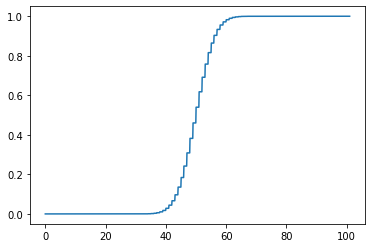

In [ ]:
# Построить график функции распределения дискретной случайной величины, заданной по принципу биномиала
n=100
xsi = np.arange(0,n+1)
p = [x for x in MyLikeBinomRandomVariable(n,0.5)]
x = np.linspace(0,max(xsi)+1,1000)
raspr = GenerateDistributionFunction(xsi,p)
y=[raspr(x0) for x0 in x]
plt.plot(x,y)

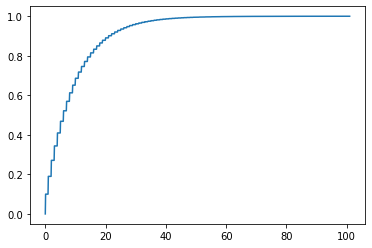

In [ ]:
# Построить график функции распределения дискретной случайной величины, заданной по принципу геиметрического распределения
n=100
xsi = np.arange(0,n+1)
p = [x for x in MyLikeGeomRandomVariable(n,0.1)]
x = np.linspace(0,max(xsi)+1,1000)
raspr = GenerateDistributionFunction(xsi,p)
y=[raspr(x0) for x0 in x]
plt.plot(x,y)

---
## Random tests

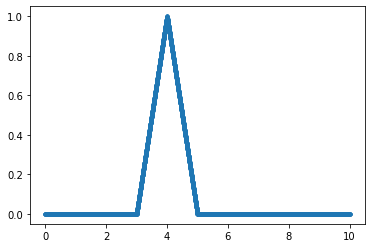

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

def fun (n, x): 
    if n <= x <= n + 1:
        return float(x) - n 
    elif n + 1 <= x <= n + 2:
        return 2.0 - x + n 
    return 0.0 

vfun = np.vectorize(fun)

x = np.linspace(0, 10, 10000)    
y = vfun(3, x)

plt.plot(x, y, '.')
plt.show()

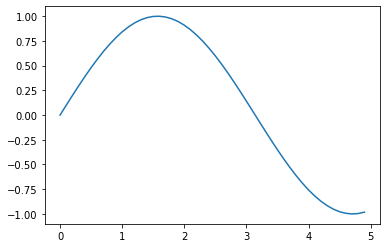

In [ ]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)

In [ ]:
# # 

# # list(pairwise(xsi))

# # [x<=0]   [x>max(xsi)]


# cs = np.cumsum(p)
# ysl = np.array([np.all([i[0]<x,x<=i[1]],axis=0) for i in pairwise(xsi)]+[x>max(xsi)])

# pw = []
# for i in ysl.T:
#   nz = np.nonzero(i)[0]
#   if len(nz)==0: pw.append(0)
#   else: pw.append(np.cumsum(p)[nz[0]])
# # pw.append 

# # np.piecewise(y, ysl, cs[:-1])
# # len(xsi)

# pxsi = pairwise(xsi)





In [ ]:
# zl = list(zip(x,pw))
# zl

[(0, 0), (1, 0), (2, 0), (3, 0.85), (4, 0.95), (5, 0.99), (6, 1.0)]

In [ ]:
# x

array([0, 1, 2, 3, 4])

In [ ]:
# np.cumsum(p)

array([0.85, 0.95, 0.99, 1.  ])

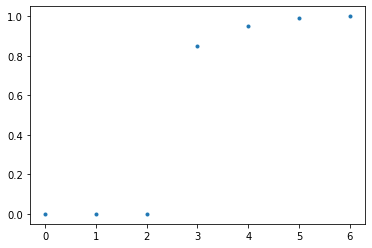

In [ ]:
# plt.plot(x,pw,'.')

In [ ]:
# np.nonzero(ysl.T[2000])[0][0]

2

In [ ]:
# np.arange(max(xsi)-min(xsi)+1)

array([0, 1])

In [ ]:
# list(pairwise(xsi))

[(0, 1)]

In [ ]:
# ysl

array([[False,  True]])

In [ ]:
# cs[:-1]

array([0.85])